# BAIS 3250 Project Analysis

In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Added import

In [320]:
final_df = pd.read_csv('2021-2024stats.csv')
final_df

,RANK,TEAM,RECORD,POINTS ALLOWED/GAME,RUSH YDS ALLOWED/GAME,PASS YDS ALLOWED/GAME,YARDS ALLOWED/GAME,POINTS/GAME,RUSH YDS/GAME,PASS YDS/GAME,YARDS/GAME,Season
0,1,Ohio State,14-2,12.9,87.6,144.1,231.8,35.7,166.4,256.4,422.8,2024
1,2,Notre Dame,14-2,15.5,138.1,152.8,290.9,36.1,200.9,189.5,390.4,2024
2,3,Oregon,13-1,19.4,130.1,171.1,301.2,34.9,157.9,268.5,426.4,2024
3,4,Texas,13-3,15.3,109.9,154.7,264.6,33.0,158.8,264.9,423.7,2024
4,5,Penn State,13-3,16.5,101.9,173.6,275.4,33.1,202.3,219.0,421.3,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
95,21,Arkansas,9-4,22.9,153.8,202.0,355.8,30.9,227.8,199.8,427.5,2021
96,22,Oregon,10-4,27.0,143.2,230.4,373.6,31.4,202.4,212.9,415.3,2021
97,23,Iowa,10-4,19.2,114.4,199.2,313.6,23.4,123.6,165.3,288.9,2021
98,24,Utah State,11-3,24.4,161.9,216.4,378.2,32.6,142.6,289.0,431.6,2021


## Analysis

In [323]:
# Show basic summary statistics for numerical columns
print("Basic Summary Statistics:")
print(final_df.describe())

# Check for missing values in the dataset
print("\nMissing values per column:")
print(final_df.isnull().sum())

# Check for unique values in each column (useful for categorical data)
print("\nUnique values per column:")
print(final_df.nunique())

Basic Summary Statistics:
             RANK  POINTS ALLOWED/GAME  RUSH YDS ALLOWED/GAME  \
count  100.000000           100.000000             100.000000   
mean    12.990000            20.782000             125.573000   
std      7.256477             4.318796              26.600717   
min      1.000000            10.200000              75.500000   
25%      6.750000            18.100000             111.200000   
50%     13.000000            20.950000             122.000000   
75%     19.000000            23.175000             148.225000   
max     25.000000            29.200000             197.900000   

       PASS YDS ALLOWED/GAME  YARDS ALLOWED/GAME  POINTS/GAME  RUSH YDS/GAME  \
count             100.000000          100.000000   100.000000     100.000000   
mean              198.164000          323.729000    34.889000     179.135000   
std                32.536135           44.816991     4.966268      37.371326   
min               132.700000          221.900000    15.400000      6

## Question 1: With given information from the last 4 seasons, can we use different statistics to predict Points and Yards per Game?

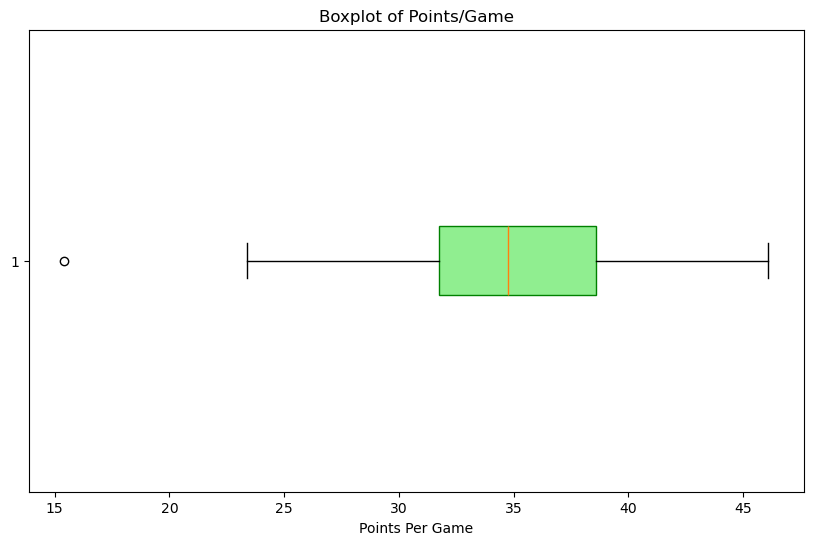

In [326]:
# Boxplot of POINTS
plt.figure(figsize=(10, 6))
plt.boxplot(final_df['POINTS/GAME'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))
plt.title('Boxplot of Points/Game')
plt.xlabel('Points Per Game')
plt.show()

### Relationship between Rush Yards per Game and Pass Yards per Game

In [329]:
# Calculate Pearson correlation
corr, p_value = pearsonr(final_df['RUSH YDS/GAME'], final_df['PASS YDS/GAME'])

print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant negative correlation between rush yards and pass yards.")
else:
    print("Fail to reject the null hypothesis. No significant correlation between rush yards and pass yards.")


Pearson Correlation: -0.3470
P-value: 0.0004
Reject the null hypothesis. There is a significant negative correlation between rush yards and pass yards.


### Predicting Points using linear Regression based on rush and pass yards

Mean Squared Error (MSE): 3.88
R-squared (R²): 0.86

Feature Importances (Coefficients):
RUSH YDS/GAME: 2.5186
PASS YDS/GAME: 2.5243
YARDS/GAME: -2.4409


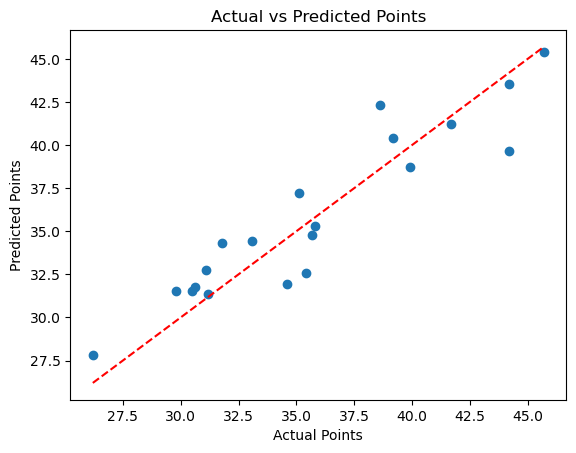

In [332]:
# Select the offense features
X = final_df[['RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME']]

# Select the target variable
y = final_df['POINTS/GAME']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Fit (train) the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# See the model coefficients
print("\nFeature Importances (Coefficients):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

### Ridge Regression

Ridge Regression Results:
  Mean Squared Error: 3.948
  R-squared: 0.860


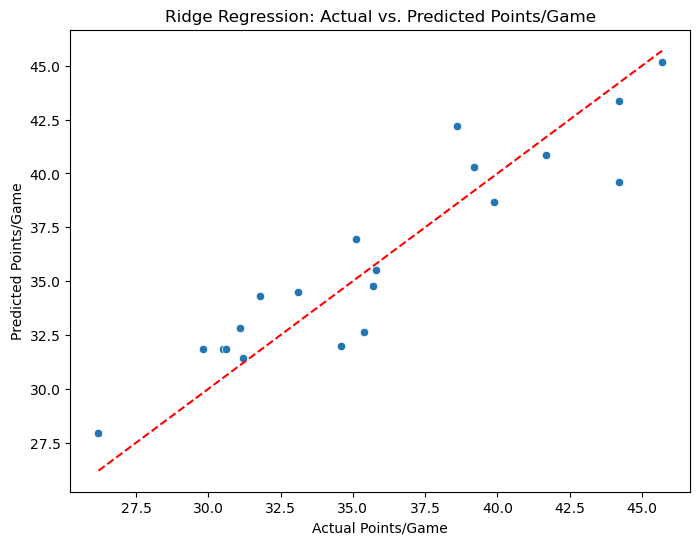

In [335]:
# Select Features and Target
features = ['RUSH YDS/GAME', 'PASS YDS/GAME']  # Independent variables (predictors)
X = final_df[features]
y = final_df['POINTS/GAME']  # Dependent variable (what we want to predict)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (Ridge Regression)
model = Ridge(alpha=1.0)  # You can tune alpha (regularization strength)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print(f"  Mean Squared Error: {mse:.3f}")
print(f"  R-squared: {r2:.3f}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Points/Game')
plt.ylabel('Predicted Points/Game')
plt.title('Ridge Regression: Actual vs. Predicted Points/Game')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal prediction line
plt.show()

### Lasso Regression

Lasso Regression Results:
  Mean Squared Error: 4.026
  R-squared: 0.857


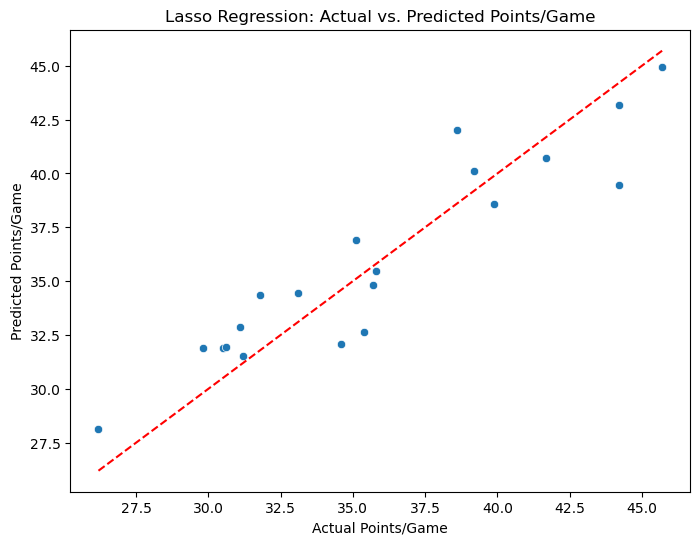

In [338]:
# Select Features and Target
features = ['RUSH YDS/GAME', 'PASS YDS/GAME']  # Independent variables
X = final_df[features]
y = final_df['POINTS/GAME']  # Dependent variable

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (Lasso Regression)
model = Lasso(alpha=0.1, random_state=42)  # You can tune alpha
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print(f"  Mean Squared Error: {mse:.3f}")
print(f"  R-squared: {r2:.3f}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Points/Game')
plt.ylabel('Predicted Points/Game')
plt.title('Lasso Regression: Actual vs. Predicted Points/Game')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal prediction line
plt.show()

In [346]:
# Select features and target
features = ['RANK', 'POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME', 'YARDS ALLOWED/GAME', 'RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME', 'Season']
target = 'POINTS/GAME'

X = final_df[features]
y = final_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Model:")
print(f"  Mean Squared Error: {mse_knn:.2f}")
print(f"  R-squared: {r2_knn:.2f}")


KNN Regression Model:
  Mean Squared Error: 8.61
  R-squared: 0.69


## Question 2: Is there a significant difference in offensive and defensive efficiency between the 5 top-ranked and the other ranked teams?

### Hypthosis Testing

In [222]:
final_df['Top_5'] = (final_df['RANK'] <= 5).astype(int)  # 1 for Top 5, 0 for others

# Separate data for Top 5 and Other teams
top_5_points = final_df[final_df['Top_5'] == 1]['POINTS/GAME']
other_points = final_df[final_df['Top_5'] == 0]['POINTS/GAME']

# Shapiro-Wilk test
shapiro_top5_result = stats.shapiro(top_5_points)
shapiro_other_result = stats.shapiro(other_points)
print("Shapiro-Wilk Test for Normality:")
print(f"Top 5 Teams: Shapiro-Wilk statistic = {shapiro_top5_result.statistic:.3f}, p-value = {shapiro_top5_result.pvalue:.3e}")
print(f"Other Teams: Shapiro-Wilk statistic = {shapiro_other_result.statistic:.3f}, p-value = {shapiro_other_result.pvalue:.3e}")

# Levene's test
levene_result = stats.levene(top_5_points, other_points)
print("\nLevene's Test for Homogeneity of Variances:")
print(f"Levene's statistic = {levene_result.statistic:.3f}, p-value = {levene_result.pvalue:.3e}")

# t-test
if levene_result.pvalue > 0.05:
    print("\nPerforming Independent Samples t-test (equal variances assumed):")
    t_statistic, p_value = stats.ttest_ind(top_5_points, other_points, equal_var=True)
else:
    print("\nPerforming Welch's t-test (unequal variances assumed):")
    t_statistic, p_value = stats.ttest_ind(top_5_points, other_points, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3e}")

# Results
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"\nThe p-value ({p_value:.3e}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
    print("Conclusion: Top 5 ranked teams score significantly higher points per game than other teams.")
else:
    print(f"\nThe p-value ({p_value:.3e}) is greater than or equal to the significance level ({alpha}), so we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that Top 5 ranked teams score significantly higher points per game than other teams.")

Shapiro-Wilk Test for Normality:
Top 5 Teams: Shapiro-Wilk statistic = 0.962, p-value = 5.921e-01
Other Teams: Shapiro-Wilk statistic = 0.964, p-value = 2.516e-02

Levene's Test for Homogeneity of Variances:
Levene's statistic = 2.678, p-value = 1.049e-01

Performing Independent Samples t-test (equal variances assumed):
T-statistic: 2.327
P-value: 2.205e-02

The p-value (2.205e-02) is less than the significance level (0.05), so we reject the null hypothesis.
Conclusion: Top 5 ranked teams score significantly higher points per game than other teams.


### Rush Yards per Game versus Pass Yards per Game

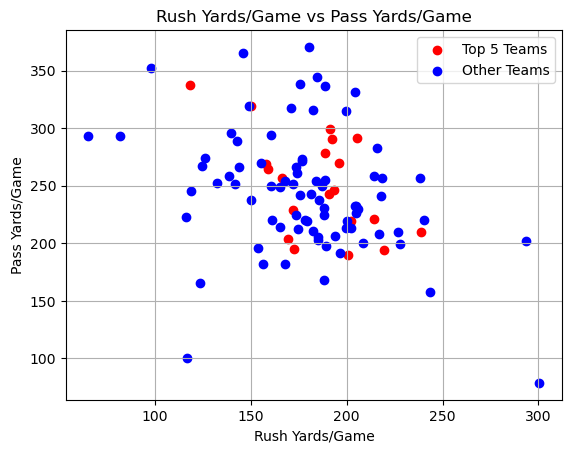

In [237]:
# Create a condition for top-ranked teams
top_teams = final_df['RANK'].between(1, 5)

# Scatter plot for top 5 teams (make them red)
plt.scatter(final_df.loc[top_teams, 'RUSH YDS/GAME'], 
            final_df.loc[top_teams, 'PASS YDS/GAME'], 
            color='red', label='Top 5 Teams')

# Scatter plot for all other teams (make them blue)
plt.scatter(final_df.loc[~top_teams, 'RUSH YDS/GAME'], 
            final_df.loc[~top_teams, 'PASS YDS/GAME'], 
            color='blue', label='Other Teams')

# Add labels, title, and legend
plt.xlabel('Rush Yards/Game')
plt.ylabel('Pass Yards/Game')
plt.title('Rush Yards/Game vs Pass Yards/Game')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Points Allowed versus Points Scored

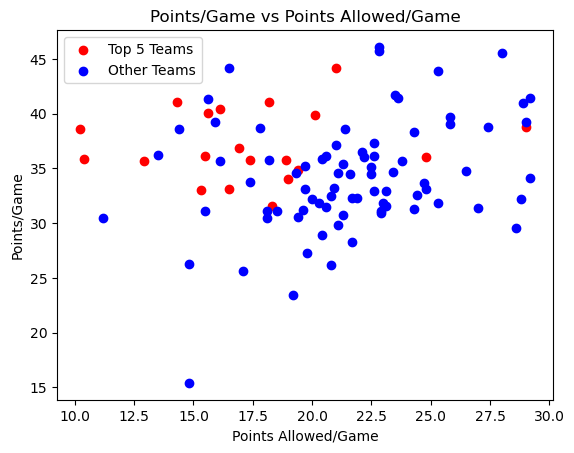

In [240]:
# Create a condition for top-ranked teams
top_teams = final_df['RANK'].between(1, 5)

# Plot top teams in red
plt.scatter(final_df.loc[top_teams, 'POINTS ALLOWED/GAME'],
            final_df.loc[top_teams, 'POINTS/GAME'],
            color='red', label='Top 5 Teams')

# Plot other teams in blue
plt.scatter(final_df.loc[~top_teams, 'POINTS ALLOWED/GAME'],
            final_df.loc[~top_teams, 'POINTS/GAME'],
            color='blue', label='Other Teams')

# Add labels and title
plt.xlabel('Points Allowed/Game')
plt.ylabel('Points/Game')
plt.title('Points/Game vs Points Allowed/Game')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Decision tree for top 5 teams

Decision Tree Classification Results:
  Accuracy: 0.800
  F1-score: 0.600


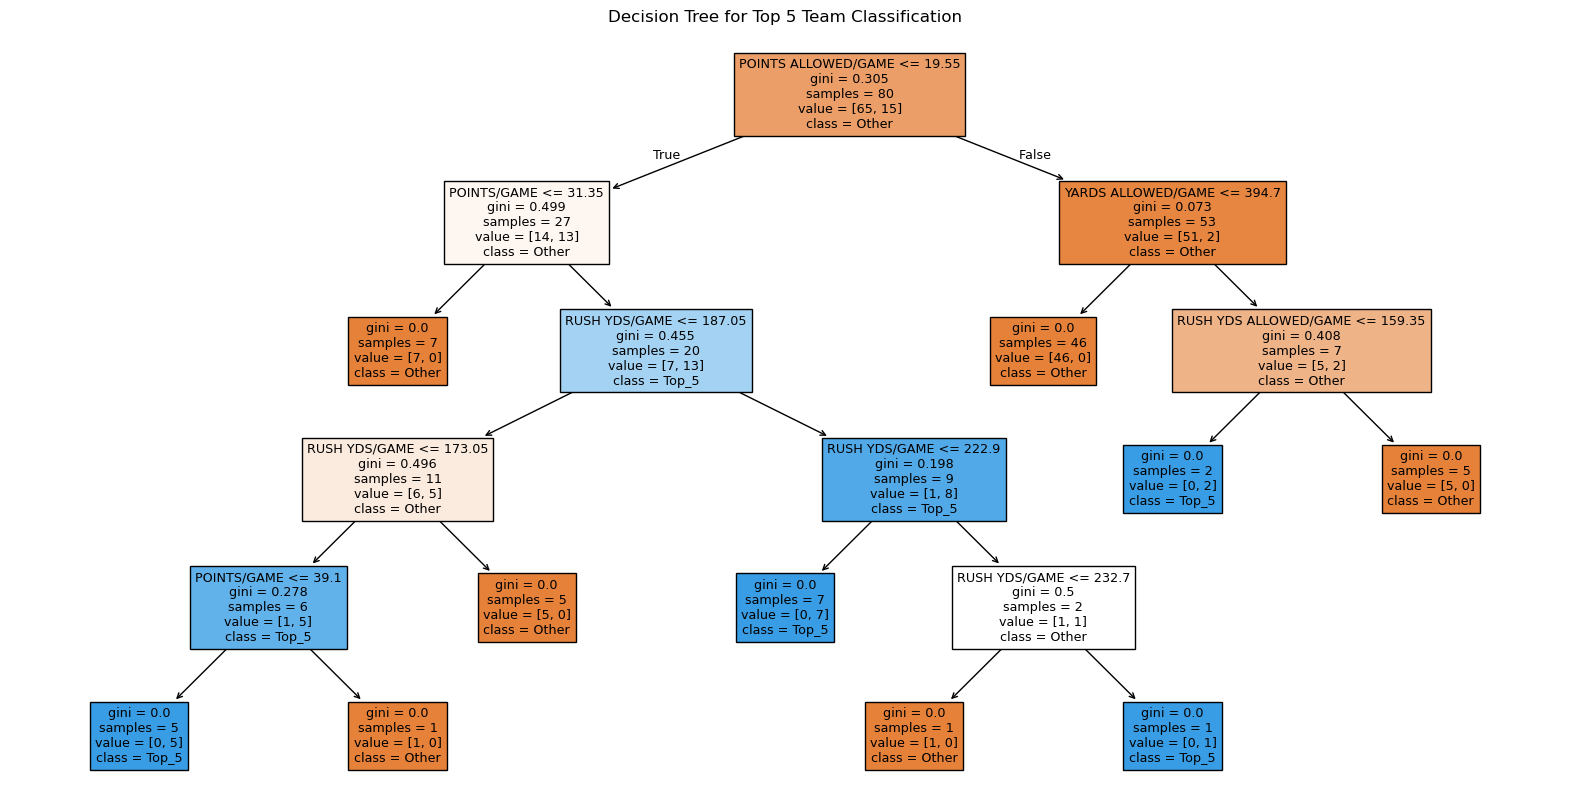

In [242]:
# Create the binary target variable 'Top_5'
final_df['Top_5'] = (final_df['RANK'] <= 5).astype(int)  # 1 for Top 5, 0 for others

# Select features and target variable
features = ['POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME',
            'POINTS/GAME', 'RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME', 'YARDS ALLOWED/GAME']
X = final_df[features]
y = final_df['Top_5']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can tune max_depth
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Classification Results:")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1-score: {f1:.3f}")

# Visualize the Decision Tree (optional, but very helpful)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Other', 'Top_5'], filled=True)
plt.title('Decision Tree for Top 5 Team Classification')
plt.show()

### Logistic Regression model for top 5 teams vs. other teams

Logistic Regression Results:
  Accuracy: 0.700
  F1-score: 0.250
  AUC-ROC: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.33      0.20      0.25         5

    accuracy                           0.70        20
   macro avg       0.55      0.53      0.53        20
weighted avg       0.66      0.70      0.67        20



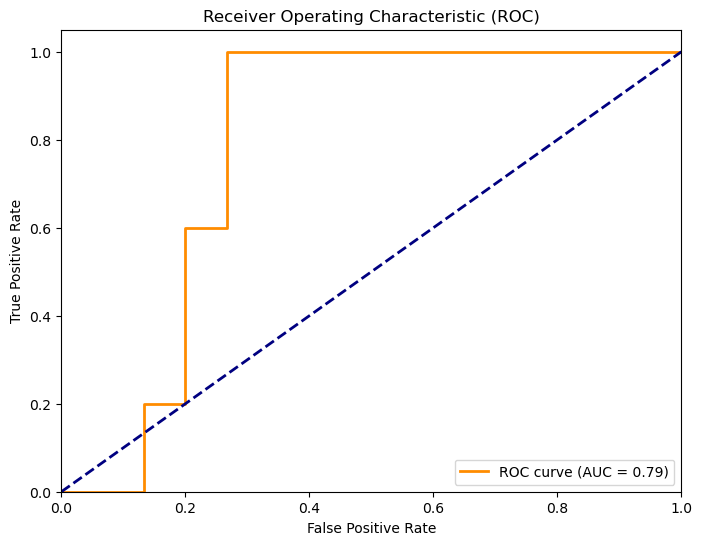


Logistic Regression Coefficients:
  POINTS ALLOWED/GAME: -1.4576
  RUSH YDS ALLOWED/GAME: 0.2530
  PASS YDS ALLOWED/GAME: 0.0591
  POINTS/GAME: 0.6571
  RUSH YDS/GAME: -0.0031
  PASS YDS/GAME: 0.1271
  YARDS/GAME: 0.1289
  YARDS ALLOWED/GAME: 0.1966
  Intercept: -1.8507


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Top 5 Teams
final_df['Top_5'] = (final_df['RANK'] <= 5).astype(int)  # 1 for Top 5, 0 for others

# Features
features = ['POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME',
            'POINTS/GAME', 'RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME', 'YARDS ALLOWED/GAME']
X = final_df[features]
y = final_df['Top_5']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Model Training
model = LogisticRegression(random_state=42)  # Initialize Logistic Regression
model.fit(X_train_scaled, y_train)          # Train the model

# Predictions
y_pred = model.predict(X_test_scaled)       # Predicted classes (0 or 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for class 1

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)  # AUC-ROC for probability predictions

print("Logistic Regression Results:")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1-score: {f1:.3f}")
print(f"  AUC-ROC: {auc_roc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculate ROC curve values
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Coefficients
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"  {feature}: {coef:.4f}")
print(f"  Intercept: {model.intercept_[0]:.4f}")

### KNN model

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 teams
final_df['Top_5'] = (final_df['RANK'] <= 5).astype(int)  # 1 for Top 5, 0 for others

# Select Features
features = ['POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME',
            'POINTS/GAME', 'RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME', 'YARDS ALLOWED/GAME']
X = final_df[features]
y = final_df['Top_5']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (KNN)
model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("KNN Classification Results:")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1-score: {f1:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Classification Results:
  Accuracy: 0.650
  F1-score: 0.222

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.25      0.20      0.22         5

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20



### Linear Regression model for top 5 teams

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create the binary target variable 'Top_5'
final_df['Top_5'] = (final_df['RANK'] <= 5).astype(int)  # 1 for Top 5, 0 for others

# Select features and target variable
features = ['POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME',
            'POINTS/GAME', 'RUSH YDS/GAME', 'PASS YDS/GAME', 'YARDS/GAME', 'YARDS ALLOWED/GAME']
X = final_df[features]
y = final_df['Top_5']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (for binary classification, we might look at how well the regression
# output separates the two classes. We'll use a threshold of 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression for Top 5 Team Classification:")
print(f"  Accuracy (thresholded at 0.5): {accuracy:.3f}")
print(f"  F1-score (thresholded at 0.5): {f1:.3f}")
print(f"  Mean Squared Error: {mse:.3f}")
print(f"  R-squared: {r2:.3f}")

# Print the coefficients of the linear regression model
print("\nCoefficients of the Linear Regression Model:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"  Intercept: {model.intercept_:.4f}")

Linear Regression for Top 5 Team Classification:
  Accuracy (thresholded at 0.5): 0.700
  F1-score (thresholded at 0.5): 0.250
  Mean Squared Error: 0.173
  R-squared: 0.076

Coefficients of the Linear Regression Model:
  POINTS ALLOWED/GAME: -0.0738
  RUSH YDS ALLOWED/GAME: -0.2007
  PASS YDS ALLOWED/GAME: -0.2022
  POINTS/GAME: 0.0317
  RUSH YDS/GAME: -1.6376
  PASS YDS/GAME: -1.6373
  YARDS/GAME: 1.6369
  YARDS ALLOWED/GAME: 0.2056
  Intercept: -0.4337


## Question 3: Which defensive metric has the strongest correlation with a team's Rank, and can we predict Points Allowed per Game?

Correlation with RANK:
PASS YDS ALLOWED/GAME    0.166006
RUSH YDS ALLOWED/GAME    0.243419
YARDS ALLOWED/GAME       0.264946
POINTS ALLOWED/GAME      0.358437
Name: RANK, dtype: float64


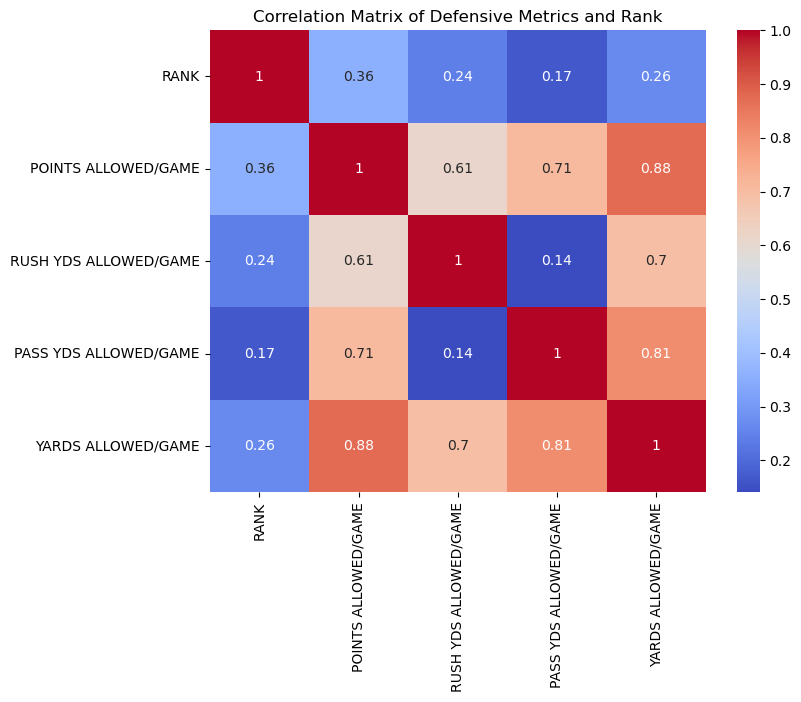

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select columns
df_defense = final_df[['RANK', 'POINTS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME',
                       'PASS YDS ALLOWED/GAME', 'YARDS ALLOWED/GAME']]

# Correlation Analysis 
corr_matrix = df_defense.corr()
rank_corr = corr_matrix['RANK'].drop('RANK').sort_values()  # Correlations with RANK

print("Correlation with RANK:")
print(rank_corr)

# Correlation Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Defensive Metrics and Rank')
plt.show()

### Scatter Plot for Rank vs. Points allowed/game

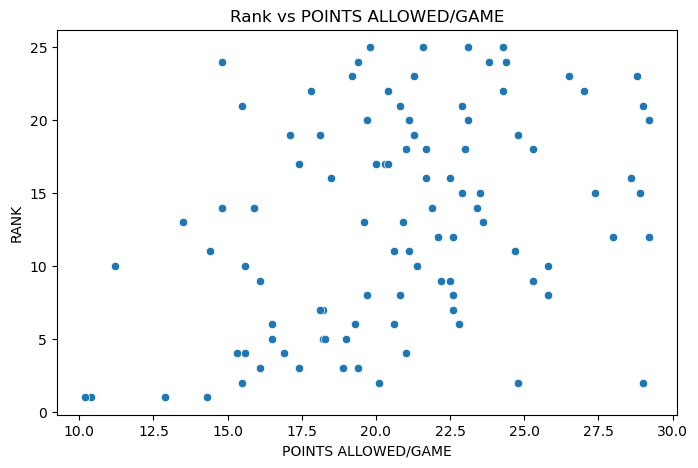

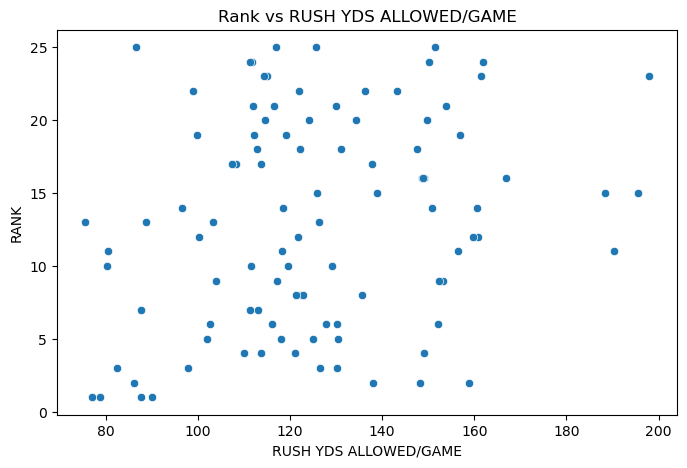

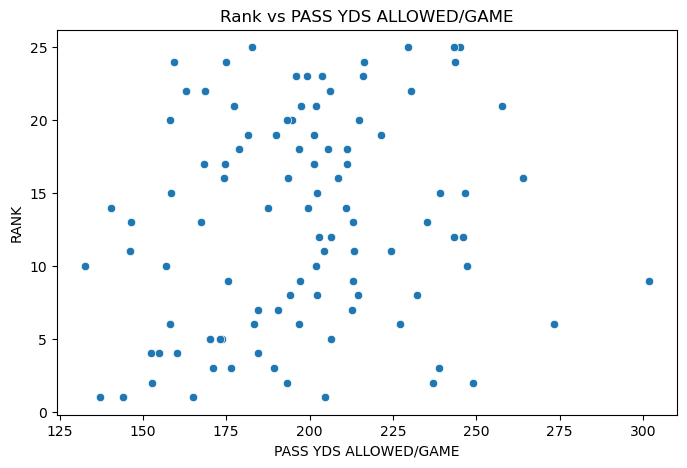

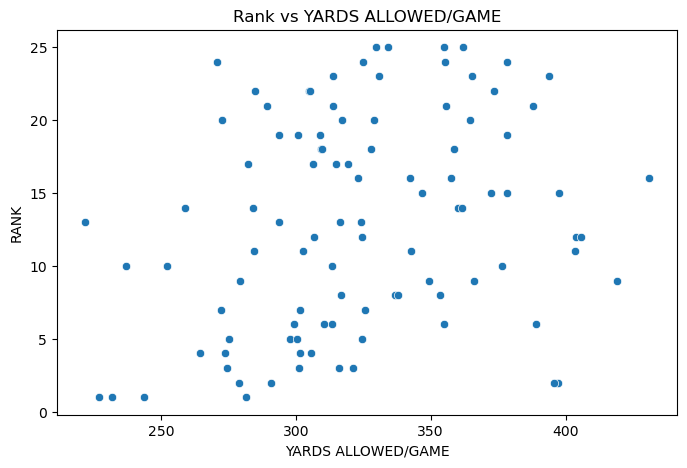

In [247]:
def plot_scatter(df, x_col, y_col, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.show()

for col in df_defense.columns:
    if col != 'RANK':
        plot_scatter(df_defense, col, 'RANK', f'Rank vs {col}')

### Linear Regression Model for Points Allowed / Game

Linear Regression:
  MSE: 5.541429501105784
  R^2: 0.5735393642368951


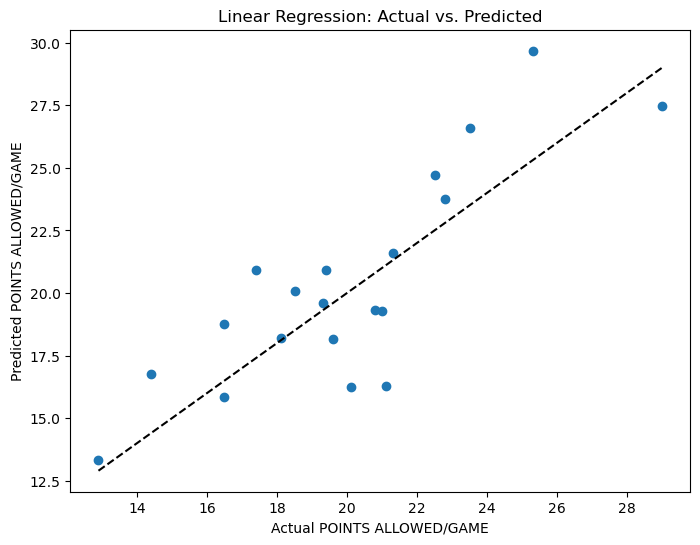

In [264]:

# Define the features (defensive statistics)
defensive_features = ['YARDS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME']

# Choose the target variable (e.g., 'YARDS ALLOWED/GAME')
target = 'POINTS ALLOWED/GAME'

# Prepare the data
X = final_df[defensive_features]
y = final_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_linear))
print("  R^2:", r2_score(y_test, y_pred_linear))


# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Ideal prediction
plt.xlabel('Actual POINTS ALLOWED/GAME')
plt.ylabel('Predicted POINTS ALLOWED/GAME')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

### Lasso Regression model for Points Allowed / Game

Lasso Regression:
  MSE: 4.831496019524557
  R^2: 0.6281748484281549
  Non-zero coefficients: 2


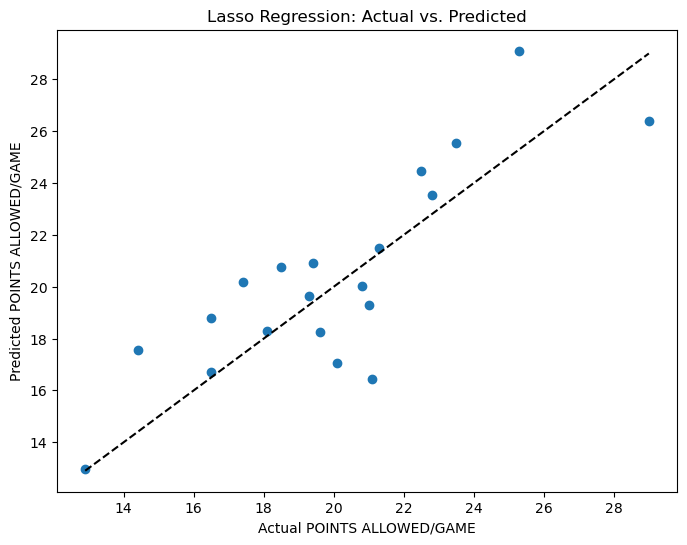

In [262]:
# Define the features (defensive statistics)
defensive_features = ['YARDS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME']

# Choose the target variable (e.g., 'YARDS ALLOWED/GAME')
target = 'POINTS ALLOWED/GAME'

# Prepare the data
X = final_df[defensive_features]
y = final_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.1)  # You can tune alpha
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

print("Lasso Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_lasso))
print("  R^2:", r2_score(y_test, y_pred_lasso))
print("  Non-zero coefficients:", np.sum(lasso_model.coef_ != 0))


# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Ideal prediction
plt.xlabel('Actual POINTS ALLOWED/GAME')
plt.ylabel('Predicted POINTS ALLOWED/GAME')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.show()

### Ridge Regression for Points Allowed / Game

Ridge Regression:
  MSE: 4.976572845065671
  R^2: 0.617009939582448


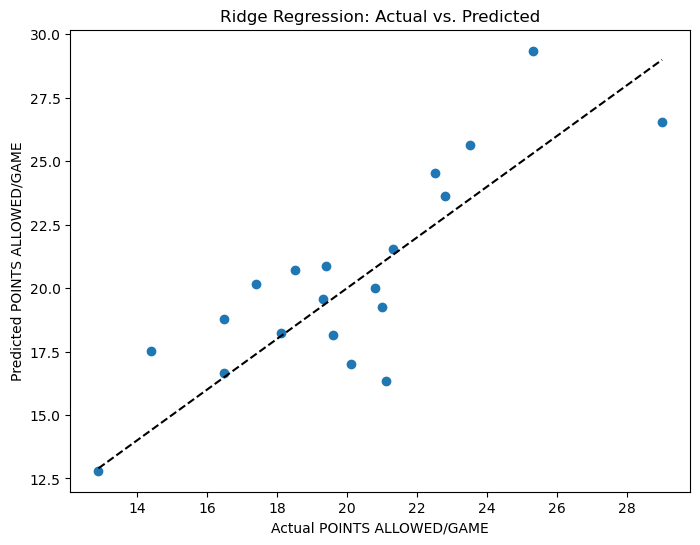

In [268]:
# Define the features (defensive statistics)
defensive_features = ['YARDS ALLOWED/GAME', 'RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME']

# Choose the target variable (e.g., 'YARDS ALLOWED/GAME')
target = 'POINTS ALLOWED/GAME'

# Prepare the data
X = final_df[defensive_features]
y = final_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Regression:")
print("  MSE:", mean_squared_error(y_test, y_pred_ridge))
print("  R^2:", r2_score(y_test, y_pred_ridge))


# Visualization 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Ideal prediction
plt.xlabel('Actual POINTS ALLOWED/GAME')
plt.ylabel('Predicted POINTS ALLOWED/GAME')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.show()

### Decision Tree for Points Allowed / Game

Decision Tree Classification:
  Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



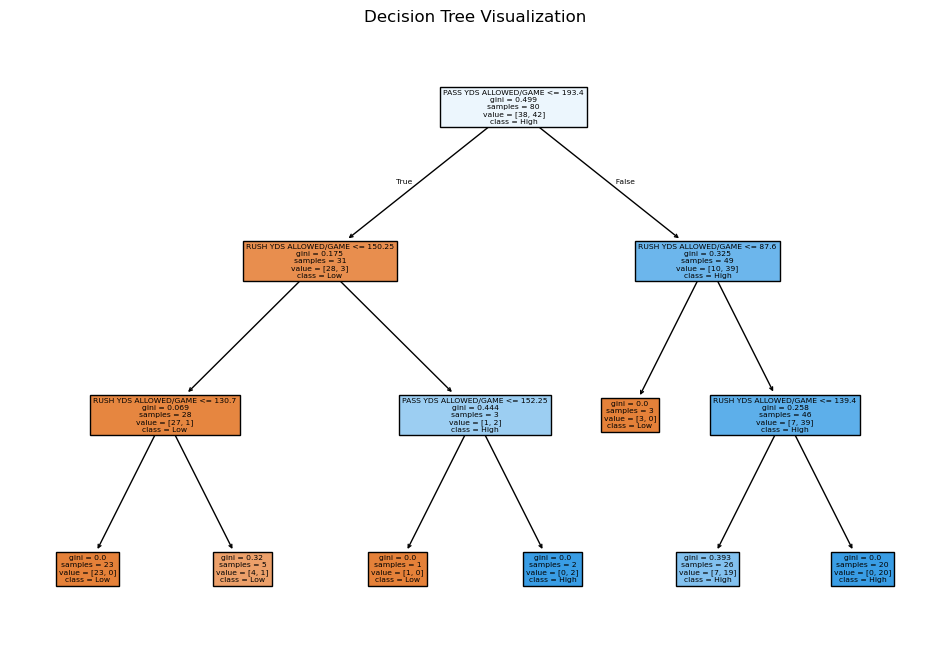

In [287]:
# Define the features (defensive statistics)
defensive_features = ['RUSH YDS ALLOWED/GAME', 'PASS YDS ALLOWED/GAME']

# Choose the target variable: Classify 'POINTS ALLOWED/GAME'
median_points_allowed = final_df['POINTS ALLOWED/GAME'].median()
final_df['POINTS_ALLOWED_CLASS'] = (final_df['POINTS ALLOWED/GAME'] > median_points_allowed).astype(int)
target = 'POINTS_ALLOWED_CLASS'

# Prepare the data
X = final_df[defensive_features]
y = final_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree Classification 
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # You can tune max_depth
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Classification:")
print("  Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Tree Visualization 
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=defensive_features, class_names=['Low', 'High'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()